## Unit3_Lesson5_Project3: Guided_example_and_challenge

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [26]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

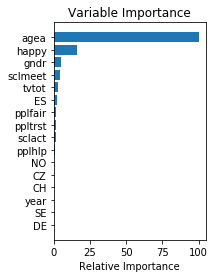

In [4]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

## Solution

**There's no much left to be done here as per adding features. So I will start the model optimization with `subsampling`**

### Subsampling
**Brief Description of subsampling from Sklearn:** The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. 

In [5]:
#let's first try a subsample of 0.8 and sample if anything changes.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
          'subsample' : 0.8}

#re-run model with new parameters

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04746317512274959
Percent Type II errors: 0.1723949809056192

Test set accuracy:
Percent Type I errors: 0.07607361963190185
Percent Type II errors: 0.18036809815950922


**changing the subsampling value is not making any noticeable changes to the model's performance, I used values ranging from 0.5 to 0.9 with no luck**

### More iterations
Let's try more iterations and see how things go. Here we will use 100 estimators

In [6]:
#let's try more iterations
params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance',
         }

#re-run model with new parameters

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))



Training set accuracy:
Percent Type I errors: 0.044189852700491
Percent Type II errors: 0.1692580469176214

Test set accuracy:
Percent Type I errors: 0.07116564417177915
Percent Type II errors: 0.18036809815950922


**This provide a little performance in provement**

### Trying a different loss function
Rather than using `deviance` as I have been doint previously, now I will use `exponential`

In [7]:
#let's change our loss to exponential as per sklearn documentation
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'exponential',
         }

#re-run model with new parameters

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04841789416257501
Percent Type II errors: 0.1778505182760502

Test set accuracy:
Percent Type I errors: 0.0638036809815951
Percent Type II errors: 0.18773006134969325


**Phew! Things actually got slightly was with exponential loss function**

### Lastly I will change the structure of the weak learner(i.e the decision tree): Allowing more leaves in the tree.

In [8]:
#here i will change max_depth to 4
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'exponential',
         }

#re-run model with new parameters

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0231860338243317
Percent Type II errors: 0.12302236770321877

Test set accuracy:
Percent Type I errors: 0.08711656441717791
Percent Type II errors: 0.18159509202453988


**This optimization produce the most significance performance improvement perticularly with the `trainning set`**

# Further read on Gradient Boosting Model - GBM:
source: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

**Boosting** is a sequential techniques which follows the principle of ensemble. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. This technique is followed for a classification problem while a similar technique is used for regression. In the end, all models are given a weight depending on their accuracy and a consolidated result is generated.

## GBM Parameters
The overall parameters are divided into three categories:

**Tree-Specific Parameters:** These affect each individual tree in the model.

**Boosting Parameters**: These affect the boosting operation in the model.

**Miscellaneous Parameters**: Other parameters for overall functioning.


### Tree-Specific Parameters
Here all the tree defining parameters will be itemized and explained:

#### min_samples_split

Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting. Used to control over-fitting and default to 2 in Sklearn. So if you are splitting a node at minimum it should have 2 records which after splitting into two nodes will give 1 record each which is specified by the min_samples_leaf.
So,a split will not happen if there are less than a certain number of records specified by min_samples_split in a node. Higher values prevent a model from learning paterns which might be highly specific to the particular sample selected for a tree.
Too high values can lead to under-fitting hence, it should be tuned using CV.

#### min_samples_leaf
Defines the minimum samples (or observations) required in a terminal node or leaf.
Used to control over-fitting similar to min_samples_split.
Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small. A split point at any depth will only be considered if it leaves at least `min_samples_leaf` training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

#### min_weight_fraction_leaf
Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer. Only one of `min_samples_leaf` and `min_weight_fraction_leaf` should be defined.

#### max_depth
The maximum depth of a tree. Used to control over-fitting as higher depth will allow model to learn patterns very specific to a particular sample. Should be tuned using CV.

#### max_leaf_nodes
The maximum number of terminal nodes or leaves in a tree. Can be defined in place of max_depth. Since binary trees are created, a depth of `n` would produce a maximum of `2^n` leaves. If this is defined, GBM will ignore max_depth.

#### max_features
The number of features to consider while searching for a best split. The features will be randomly selected.As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features. Higher values can lead to over-fitting but depends on case to case.



**We  will now move the Gradient Boost Model Parameters itself**. But before then, let's what the seudo code for GBM look like.

In [9]:
#Initialize the outcome

#Iterate from 1 to total number of trees
  #Update the weights for targets values based on previous run (higher for the ones mis-classified)
  #Fit the model on selected subsample of data
  #Make predictions on the full set of observations
  #Update the output with current results taking into account the learning rate

#Return the final output.

### Boosting Parameters
Here are the tunning parameters for GBM
#### learning_rate
This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well. Lower values would require higher number of trees to model all the relations and will be computationally expensive.

#### n_estimators
The number of sequential trees to be modeled. Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.

#### subsample
The fraction of observations to be selected for each tree. For running a tree, the whole of the observations should not be used, a random number of samples defines by `subsample` is rather used(but conversly, the whole of the data is fitted to each `Decision Tree` model and weighted based on the learning rate). Selection is done by random sampling. Values slightly less than 1(i.e a fraction of the total observations) make the model robust by reducing the variance. Typical values ~0.8 generally work fine but can be fine-tuned further. 

We will now look at other mecellanious parameters

### miscellaneous parameters
#### loss
It refers to the loss function to be minimized in each split.It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.
### init
This affects initialization of the output.This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM - i.e we will be using the outcome of the model as our target.
### random_state
The random number seed so that same random numbers are generated every time. This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models. It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used.
### verbose
The type of output to be printed when the model fits. The different values can be:<br>
0: no output generated (default)<br>
1: output generated for trees in certain intervals<br>
**>1**: output generated for all trees<br>
### warm_start
This parameter has an interesting application and can help a lot if used judicially. Using this, we can fit additional trees on previous fits of a model. It can save a lot of time and you should explore this option for advanced applications.
### presort 
Select whether to presort data for faster splits. It makes the selection automatically by default but it can be changed if needed.


# Applying parameter tunning
Unlike what I did previously in the challenge above, where I only tunned the BGM parameters one after the other, this time around I will use `GridSearchCV`to iterate and obtain the best parameters starting from the decision tree to the BGM

In [10]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import cross_val_score   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn import metrics

**Since this will be quite repetitive, let's first define a function which will help us create GBM models and perform cross-validation.**

In [11]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Predict training set:
    X_train_predictions = alg.predict(X)
    #this line generate the probability of each training data point belonging to either class(0 or 1 in our case)
    #the array will have shape(N,2) and both column will always sum to 1
    X_train_predprob = alg.predict_proba(X)[:,1]
    
    #Perform cross-validation:
    #An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification 
    #model at all classification thresholds. This curve plots two parameters: True Posive Rate(TPR) and True Negative Rate(TNR)
    if performCV:
        cv_score = cross_val_score(alg, X, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y.values, X_train_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y, X_train_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),
                                                                                 np.std(cv_score),
                                                                                 np.min(cv_score),
                                                                                 np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

**Lets start by creating a `baseline model`. In this case, the evaluation metric is `AUC` so using any constant value will give `0.5`(just like guessing with average) as result. Typically, a good baseline can be a `GBM` model with default parameters, i.e. without any tuning. Lets find out what it gives:**


Model Report
Accuracy : 0.7723
AUC Score (Train): 0.819051
CV Score : Mean - 0.7913538 | Std - 0.01519806 | Min - 0.7699938 | Max - 0.8144466


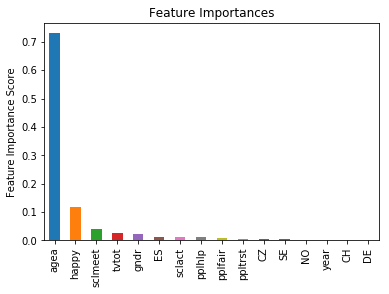

In [12]:
#Choose all predictors except target
#predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train, y_train)

**So, the mean CV score is `0.7913538` and we should expect our model to do better than this, the `Std: 0.01519806` is also quite high. Let's now proceed to tunning**

## General Approach for Parameter Tuning

As discussed earlier, there are two types of parameter to be tuned here – tree based and boosting parameters. There are no optimum values for learning rate as low values always work better, given that we train on sufficient number of trees.

Though, GBM is robust enough to not overfit with increasing trees, but a high number for pa particular learning rate can lead to overfitting. But as we reduce the learning rate and increase trees, the computation becomes expensive and would take a long time to run on standard personal computers.

Keeping all this in mind, we can take the following approach:

Choose a relatively **high learning rate**. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems<br>
Determine the **optimum number of trees** for this learning rate. This should range around 40-70. Remember to choose a value on which your system can work fairly fast. This is because it will be used for testing various scenarios and determining the tree parameters.<br>
**Tune tree-specific parameters** for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.<br>
**Lower the learning rate** and increase the estimators proportionally to get more robust models.

#### Fix learning rate and number of estimators for tuning tree-based parameters
In order to decide on boosting parameters, we need to set some initial values of other parameters. Lets take the following values:

**min_samples_split** = 500 : This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.<br>
**min_samples_leaf** = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.<br>
**max_depth** = 8 : Should be chosen (5-8) based on the number of observations and predictors. This has 87K rows and 49 columns so lets take 8 here.<br>
**max_features** = ‘sqrt’ : Its a general thumb-rule to start with square root.<br>
**subsample** = 0.8 : This is a commonly used used start value

Please note that all the above are just initial estimates and will be tuned later. Lets take the default learning rate of 0.1 here and check the optimum number of trees for that. For this purpose, we can do a grid search and test out values from 20 to 80 in steps of 10.

In [13]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_estimator_, gsearch1.best_params_, gsearch1.best_score_

(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=8,
               max_features='sqrt', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=50, min_samples_split=500,
               min_weight_fraction_leaf=0.0, n_estimators=70,
               n_iter_no_change=None, presort='auto', random_state=10,
               subsample=0.8, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False),
 {'n_estimators': 70},
 0.7840720638412565)

**As you can see that here we got 60 as the optimal estimators for 0.1 learning rate. Note that 60 is a reasonable value and can be used as it is. But it might not be the same in all cases. Other situations:**

If the value is around 20, you might want to try lowering the learning rate to 0.05 and re-run grid search

If the values are too high ~100, tuning the other parameters will take long time and you can try a higher learning rate

## Tuning tree-specific parameters
We will use the following order:

Tune max_depth and num_samples_split<br>
Tune min_samples_leaf<br>
Tune max_features<br>

The order of tuning variables should be decided carefully. You should take the variables with a higher impact on outcome first. For instance, `max_depth` and `min_samples_split` have a significant impact and we’re tuning those first.

In [14]:
# max depth and num_samples_split
param_test2 = {'max_depth':range(1,8,1), 'min_samples_split':range(400,801,100)}
gsearch2 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, 
                                                                n_estimators=70, 
                                                                max_features='sqrt', 
                                                                subsample=0.8, 
                                                                random_state=10),
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

#fit grid
gsearch2.fit(X_train, y_train)

#get output
gsearch2.best_estimator_, gsearch2.best_params_, gsearch2.best_score_

(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_features='sqrt', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=800,
               min_weight_fraction_leaf=0.0, n_estimators=70,
               n_iter_no_change=None, presort='auto', random_state=10,
               subsample=0.8, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False),
 {'max_depth': 4, 'min_samples_split': 800},
 0.7807241320634445)

**So this output says that are optimum `max_depth = 4` and `min_samples_split = 800`**. I'm curious that the optimum `min_samples_split` is taking the maximum value in the provided range, this migth not be the optimum value. I will try a higher range leaving the `max_depth` at 4. Also, I'll test for 5 values of min_samples_leaf, from 30 to 70 in steps of 10, along with higher min_samples_split.

In [15]:
# further optimizing main_sample_split
param_test3 = {'min_samples_split':range(800,2001,100), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, 
                                                                n_estimators=70, 
                                                                max_features='sqrt',
                                                                max_depth = 4,
                                                                subsample=0.8, 
                                                                random_state=10),
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

#fit grid
gsearch3.fit(X_train, y_train)

#get output
gsearch3.best_estimator_, gsearch3.best_params_, gsearch3.best_score_

(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_features='sqrt', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=30, min_samples_split=900,
               min_weight_fraction_leaf=0.0, n_estimators=70,
               n_iter_no_change=None, presort='auto', random_state=10,
               subsample=0.8, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False),
 {'min_samples_leaf': 30, 'min_samples_split': 900},
 0.7870453346310777)

Here we get the optimum values as `900` for `min_samples_split` and `30` for `min_samples_leaf`. Also, we can see the `CV score` increasing to `0.7850` now. Let’s fit the model again on this and have a look at the feature importance.


Model Report
Accuracy : 0.7652
AUC Score (Train): 0.808124
CV Score : Mean - 0.783888 | Std - 0.01961957 | Min - 0.7504178 | Max - 0.8102312


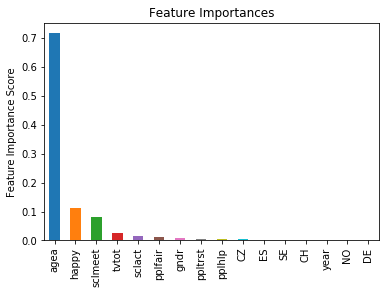

In [16]:
#where do we stand with the model?
modelfit(gsearch3.best_estimator_, X_train, y_train)

**Hey! This seems to be performing lesser than the base model, but let's carry on with tunning anyways. Now lets tune the last tree-parameters, i.e. max_features by trying 7 values from 7 to 19 in steps of 2.**

In [17]:
#We have just 16 feature in out data, we will use range 2 to 16 at a step of 2
param_test4 = {'max_features':range(2,17,2)}
gsearch4 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, 
                                                                n_estimators=70,
                                                                max_depth=4,
                                                                min_samples_split=900,
                                                                min_samples_leaf=30, 
                                                                subsample=0.8, 
                                                                random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

#fit grid
gsearch4.fit(X_train, y_train)

#get output
gsearch4.best_estimator_, gsearch4.best_params_, gsearch4.best_score_

(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_features=16, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=30, min_samples_split=900,
               min_weight_fraction_leaf=0.0, n_estimators=70,
               n_iter_no_change=None, presort='auto', random_state=10,
               subsample=0.8, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False),
 {'max_features': 16},
 0.7882704563109991)

**Optimum `max_features` is 16, I'm not convinced about this though, splitting with all features is prone to over-ftting**

## Tuning subsample and making models with lower learning rate

In [18]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators=70,
                                                               max_depth=4,
                                                               min_samples_split=900, 
                                                               min_samples_leaf=30, subsample=0.8, 
                                                               random_state=10,
                                                               max_features=16),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

#fit grid
gsearch5.fit(X_train, y_train)

#get output
gsearch5.best_estimator_, gsearch5.best_params_, gsearch5.best_score_

(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_features=16, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=30, min_samples_split=900,
               min_weight_fraction_leaf=0.0, n_estimators=70,
               n_iter_no_change=None, presort='auto', random_state=10,
               subsample=0.85, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False),
 {'subsample': 0.85},
 0.7895274091062264)

**So our `subsample` optimum turned out to be `0.85`. Now that we have all our tree parameters optimised, let's play around with the learning rate and number of trees(n_estimators) to see how much this will improved our accuracy.**

#### Lets decrease the learning rate to half, i.e. 0.05 with twice (140) the number of trees.


Model Report
Accuracy : 0.7656
AUC Score (Train): 0.812476
CV Score : Mean - 0.7891091 | Std - 0.01841264 | Min - 0.7581037 | Max - 0.8129265


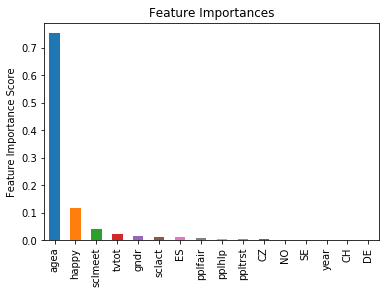

In [19]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=140,max_depth=4, min_samples_split=900,min_samples_leaf=30, subsample=0.85, random_state=10, max_features=16)
modelfit(gbm_tuned_1, X_train, y_train)

**Our baseline model is still better than this**

**Now lets reduce to one-tenth of the original value, i.e. `0.01 for 700` trees.**


Model Report
Accuracy : 0.767
AUC Score (Train): 0.813722
CV Score : Mean - 0.7892672 | Std - 0.01825314 | Min - 0.7585179 | Max - 0.812998


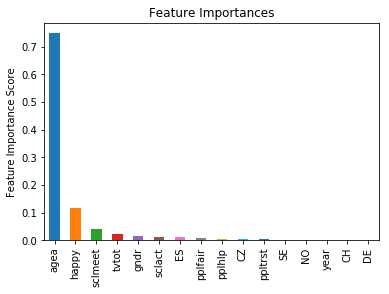

In [20]:
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=700,max_depth=4, min_samples_split=900,min_samples_leaf=30, subsample=0.85, random_state=10, max_features=16)
modelfit(gbm_tuned_2, X_train, y_train)

**Here comes some level of improvement over the last model. Let's half the rate and double the tress**


Model Report
Accuracy : 0.7665
AUC Score (Train): 0.813693
CV Score : Mean - 0.7886077 | Std - 0.01812177 | Min - 0.7582412 | Max - 0.8124558


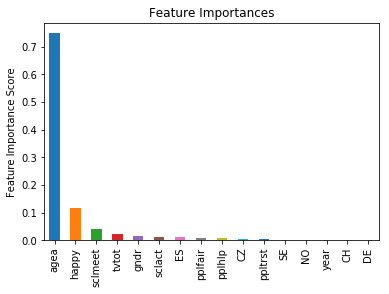

In [21]:
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1400,max_depth=4, min_samples_split=900,min_samples_leaf=30, subsample=0.85, random_state=10, max_features=16)
modelfit(gbm_tuned_3, X_train, y_train)

**The only gain we have here is a slight decrease in Std. Meanwhile the accuracy fell slightly. It seems upon all our tunning, our model has refused to improve interms of accuracy. It still performs below the base model. But we have no been checking our error types, let's see how that has faired from the base model - `gm0` to `gbm_tuned_2`(better than gbm_tuned_3).**

## Base Model - gm0

In [22]:
# Initialize and fit the model.
gm0 = ensemble.GradientBoostingClassifier(**params)
gm0.fit(X_train, y_train)

predict_train_base = gm0.predict(X_train)
predict_test_base = gm0.predict(X_test)

# Accuracy tables.
table_train_base = pd.crosstab(y_train, predict_train_base, margins=True)
table_test_base = pd.crosstab(y_test, predict_test_base, margins=True)

train_tI_errors_base = table_train_base.loc[0.0,1.0] / table_train_base.loc['All','All']
train_tII_errors_base = table_train_base.loc[1.0,0.0] / table_train_base.loc['All','All']

test_tI_errors_base = table_test_base.loc[0.0,1.0]/table_test_base.loc['All','All']
test_tII_errors_base = table_test_base.loc[1.0,0.0]/table_test_base.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors_base, train_tII_errors_base, test_tI_errors_base, test_tII_errors_base))

Training set accuracy:
Percent Type I errors: 0.0231860338243317
Percent Type II errors: 0.12302236770321877

Test set accuracy:
Percent Type I errors: 0.08711656441717791
Percent Type II errors: 0.18159509202453988


## Tuned Model - gbm_tuned_2

In [23]:
# Initialize and fit the model.
gbm_tuned_2 = ensemble.GradientBoostingClassifier(**params)
gbm_tuned_2.fit(X_train, y_train)

predict_train_tuned = gbm_tuned_2.predict(X_train)
predict_test_tuned = gbm_tuned_2.predict(X_test)

# Accuracy tables.
table_train_tuned = pd.crosstab(y_train, predict_train_tuned, margins=True)
table_test_tuned = pd.crosstab(y_test, predict_test_tuned, margins=True)

train_tI_errors_tuned = table_train_tuned.loc[0.0,1.0] / table_train_tuned.loc['All','All']
train_tII_errors_tuned = table_train_tuned.loc[1.0,0.0] / table_train_tuned.loc['All','All']

test_tI_errors_tuned = table_test_tuned.loc[0.0,1.0]/table_test_tuned.loc['All','All']
test_tII_errors_tuned = table_test_tuned.loc[1.0,0.0]/table_test_tuned.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors_tuned, train_tII_errors_tuned, test_tI_errors_tuned, test_tII_errors_tuned))

Training set accuracy:
Percent Type I errors: 0.0231860338243317
Percent Type II errors: 0.12302236770321877

Test set accuracy:
Percent Type I errors: 0.08711656441717791
Percent Type II errors: 0.18159509202453988


## Conclusion

**It turns out that our tuned model performed exactly the same way and the based model, this is sort of strange to me, how can all the error values be exacly the same meanwhile the base(gm0) and tunned(gbm_tuned_2) models have slightly different perfomance scores.**